# Correlation of the global happiness index and world GDP using Python for year 2021 

<p>The study of <b>'Happiness'</b> is a recurring theme in Philosophy, my academic discipline of provenance. The discipline has given me ideas (frameworks) and ways to think about these ideas (methodologies) that have helped me clarify the issue of happiness on a personal level. That being said, I fully support Aristotle's vision of happiness as <b><i>'human flourishing'</i></b>. What this means not only in my day-to-day, but also in the day-to-day of the other 9 trillion+ inhabitants of our planet, leaves ample room for discussion and debate.</p><img src="https://sdxl-h-p-8.stablediffusionweb.com/file=/tmp/gradio/fd3d7333a7fb9ea1073a72cbb8c3a6d11a21edcc/image.png" width="300" height="200"></p>   

<p>But the <a href="https://worldhappiness.report/">World Happiness Report</a>, published annually by the United Nations, includes in-depth analyses of the real-world factors influencing happiness, including the relationship between GDP and happiness. Their website provides access to the latest reports, research papers, and analyses in the field of happiness and well-being.</p>

<p>For this Data Science project, we shall find out how--and to what significant extent--GDP-relevant data influence the global experience of happiness. 

## 1. Loading data and data analysis framework

### Instantiating Pandas, a powerful Python-based library that we shall be leveraging to perform data transformation and analysis

In [399]:
#Access Python data analysis library
import pandas as pd

### Accessing the latest published Global GDP data by the World Economic Forum from [this site](https://ourworldindata.org/grapher/national-gdp-constant-usd-wb?tab=table) 

In [400]:
#Load the relevant data set into a Pandas DataFrame
# Getting a glimpse of the first few rows
gdp = pd.read_csv('national-gdp-constant-usd-wb.csv')
print(gdp.head())

        Entity Code  Year  GDP (constant 2015 US$)
0  Afghanistan  AFG  2002               7555185000
1  Afghanistan  AFG  2003               8222480400
2  Afghanistan  AFG  2004               8338755600
3  Afghanistan  AFG  2005               9275174000
4  Afghanistan  AFG  2006               9772083000


### Accessing our second data set containing data on the world happiness index for the year 2021 which was sourced from [this site](https://data.world/juiche/happiness-new/workspace/file?filename=world-happiness-report-2021.csv)

In [401]:
# Loading our relevant happiness index 2021 data set as a Pandas DataFrame
# Getting a glimpse of the first few rows
happiness_2021 = pd.read_csv('world-happiness-report-2021.csv')
happiness_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [402]:
# Finding out the data types and dimensions of our dataframe
happiness_2021.info()

happiness_2021.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

(149, 20)

In [403]:
# Identifying the column features of our dataframe
happiness_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

### The DataSet contains plenty of variable features. However, we are only going to use data values under the columns 'Country name', 'Regional indicator', Ladder score', and 'Logged GDP per capita', 'Healthy life expectancy', and 'Generosity'. Our new DataFrame will be called 'new_happiness_2021.' 

In [404]:
# Using a function to subset 'happiness_2021' DataFrame
# to only include the three columns: 'Country name', 'Regional indicator',
# Ladder score', and 'Logged GDP per capita',
# 'Healthy life expectancy' and 'Generosity'

def shrink_dataframe(df):
    # Selecting the desired columns
    selected_columns = ['Country name', 'Regional indicator',
                        'Ladder score', 'Logged GDP per capita','Healthy life expectancy', 
                        'Generosity']
    
    # Creating a new DataFrame with only the selected columns
    new_df = df[selected_columns].copy()
    
    return new_df

# With 'happiness_2021' as the original DataFrame,
# we would call the function like this:

new_happiness_2021 = shrink_dataframe(happiness_2021)

In [405]:
# Taking a look at the first few observations of our new DataFrame
new_happiness_2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Healthy life expectancy,Generosity
0,Finland,Western Europe,7.842,10.775,72.0,-0.098
1,Denmark,Western Europe,7.620,10.933,72.7,0.030
2,Switzerland,Western Europe,7.571,11.117,74.4,0.025
3,Iceland,Western Europe,7.554,10.878,73.0,0.160
4,Netherlands,Western Europe,7.464,10.932,72.4,0.175


### We'll replace some column names with simpler variable names which are comparable to the column variable names of our first DataFrame 'gdp'

In [406]:
# Using a Python function to replace the column variable names 'Country name', 'Ladder score', and 
# 'Logged GDP per capita' of our downsized DataFrame called 'new_happiness_2021' with the new column variable 
# names 'Country', 'Happiness ranking', and 'GDP 2021' respectively. 
def rename_columns(df):
    # Dictionary to map old column names to new column names
    column_mapping = {
        'Country name': 'Country',
        'Ladder score': 'Happiness ranking',
        'Logged GDP per capita': 'Logged GDP 2021'
    }
    
    # Rename the columns using the dictionary
    df.rename(columns=column_mapping, inplace=True)

# Calling the function
rename_columns(new_happiness_2021)

In [407]:
new_happiness_2021.head()

,Country,Regional indicator,Happiness ranking,Logged GDP 2021,Healthy life expectancy,Generosity
0,Finland,Western Europe,7.842,10.775,72.0,-0.098
1,Denmark,Western Europe,7.620,10.933,72.7,0.030
2,Switzerland,Western Europe,7.571,11.117,74.4,0.025
3,Iceland,Western Europe,7.554,10.878,73.0,0.160
4,Netherlands,Western Europe,7.464,10.932,72.4,0.175


## 2. Exploratory data analysis

Now that the data are loaded into DataFrames, we shall first lightly explore the data to determine their salient characteristics (i.e. the values, column headings, and indices). This would also give us a preview of the distribution of the data.

## 'gdp' DataFrame

In [408]:
#Finding out the number of rows and columns
gdp.shape

(10669, 4)

In [409]:
#Finding out out the column variable names
gdp.columns

Index(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$)'], dtype='object')

In [410]:
# Getting some additional details about our dataset
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10669 entries, 0 to 10668
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   10669 non-null  object
 1   Code                     9890 non-null   object
 2   Year                     10669 non-null  int64 
 3   GDP (constant 2015 US$)  10669 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 333.5+ KB


To optimize our analysis of Global GDP data 2021, we have to find out if there are missing values (and to what extent). We improve our chances of attaining clear, accurate, and comprehensive results in our analysis when we determine that our relevant data is sufficient to begin with.

In [411]:
# Checking for missing values
gdp.isna().head()

,Entity,Code,Year,GDP (constant 2015 US$)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [412]:
# Getting a tally of possible missing values for each row
# We find out that under the column 'Code' there are 779 missing values
gdp.isna().sum()

Entity                       0
Code                       779
Year                         0
GDP (constant 2015 US$)      0
dtype: int64

There are 779 empty or missing field values under the column 'Code.' Since we've had a glimpse of the first available rows of the dataframe at the outset, it stands to reason that these missing values are negligible. That is, the column 'Entity' has 0 missing values, and its field values are equivalent to the values under the neighboring column 'Code' (i.e. the former contains names of countries/nations of the world, while the latter corresponds to the respective abbreviations). 

Using the same 'gdp' DataFrame, we'll replace the column name 'GDP (constant 2015 US )' with simpler variable 'GDP'.

In [413]:
# Using a Python function to replace the column name 'GDP (constant 2015 US$)' of our DataFrame called 'gdp' 
# with the new column variable "GDP". 
def rename_columns(df):
    # Dictionary to map old column name to new column name
    column_mapping = {
        'GDP (constant 2015 US$)': 'GDP in USD',
    }
    
    # Rename the columns using the dictionary
    df.rename(columns=column_mapping, inplace=True)

# Calling the function
rename_columns(gdp)

In [414]:
gdp.head()

,Entity,Code,Year,GDP in USD
0,Afghanistan,AFG,2002,7555185000
1,Afghanistan,AFG,2003,8222480400
2,Afghanistan,AFG,2004,8338755600
3,Afghanistan,AFG,2005,9275174000
4,Afghanistan,AFG,2006,9772083000


## new_happiness_2021 DataFrame

In [415]:
#Finding out the number of rows and columns
new_happiness_2021.shape

(149, 6)

In [416]:
#Finding out out the column variable names
new_happiness_2021.columns

Index(['Country', 'Regional indicator', 'Happiness ranking', 'Logged GDP 2021',
       'Healthy life expectancy', 'Generosity'],
      dtype='object')

In [417]:
# Getting some fundamental statistics about our dataset
new_happiness_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  149 non-null    object 
 1   Regional indicator       149 non-null    object 
 2   Happiness ranking        149 non-null    float64
 3   Logged GDP 2021          149 non-null    float64
 4   Healthy life expectancy  149 non-null    float64
 5   Generosity               149 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.1+ KB


To optimize our analysis of the World Happiness Score 2021, we have to find out if there are missing values (and to what extent). We improve our chances of attaining clear, accurate, and comprehensive results in our analysis when we determine that our relevant data is sufficient to begin with.

In [418]:
# Checking for missing values
new_happiness_2021.isna().head()

,Country,Regional indicator,Happiness ranking,Logged GDP 2021,Healthy life expectancy,Generosity
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [419]:
# Getting a tally of possible missing values for each row
# We find out that under the column 'Code' there are 779 missing values
new_happiness_2021.isna().sum()

Country                    0
Regional indicator         0
Happiness ranking          0
Logged GDP 2021            0
Healthy life expectancy    0
Generosity                 0
dtype: int64

We have a tidy new_happiness_2021 DataFrame, and this makes it perfect for further data processing and analysis.

## 3. Univariate statistical analyses

Univariate analysis involves the examination of a single variable at a time. It looks at the distribution, central tendency, and dispersion of one variable without considering the relationships with other variables.

### A. Determining GDP trends across the years

Let's first find out the **_years_** covered by our data and proceed from there. 

In [420]:
# Determining the range of years under the 'Year' column using a function
def get_year_range(data_frame, year_column):
    min_year = data_frame[year_column].min()
    max_year = data_frame[year_column].max()
    return min_year, max_year

# Calling the function to get the range of years
min_year, max_year = get_year_range(gdp, 'Year')

print(f'The range of years is from {min_year} to {max_year}')

The range of years is from 1960 to 2021


We can visually explore the relationship between 'Year' and 'GDP' by creating a bar plot. That being said, we will deploy a handy data visualization tool, matplotlib.

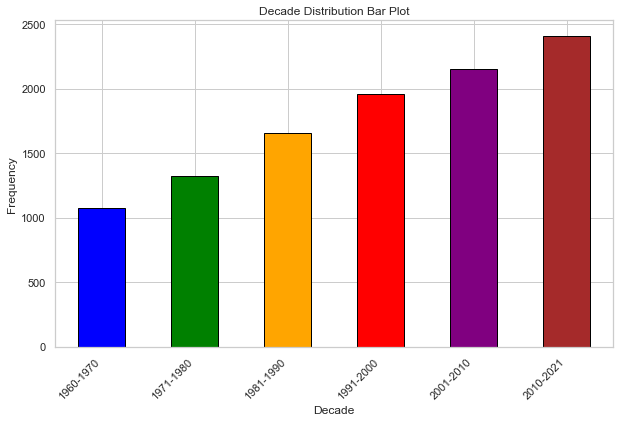

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Using the same DataFrame 'gdp' with 'Year' column, we will aggregate the values into decades to prepare
# for a more compact plot
gdp['Decade'] = pd.cut(gdp['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2021], labels=['1960-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2010-2021'])

# Counting the number of occurrences for each decade
decade_counts = gdp['Decade'].value_counts().sort_index()

# Defining colors for each decade
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

# Creating a bar plot with different colors
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.title('Decade Distribution Bar Plot')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()

Let us generate fundamental measures of central tendency (i.e. mean, median, and standard deviation). In this regard, we use numPy and the relevant functions from this library.

In [422]:
# Using the 'gdp' with 'Year', 'Decade', and 'GDP (constant 2015 US$)' columns
gdp['Decade'] = pd.cut(gdp['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2021], labels=['1960-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2010-2021'])

# Calculate mean, median, and standard deviation for 'GDP (constant 2015 US$)'
mean_gdp = gdp['GDP in USD'].mean()
min_gdp = gdp['GDP in USD'].min()
max_gdp = gdp['GDP in USD'].max()
median_gdp = gdp['GDP in USD'].median()
std_gdp = gdp['GDP in USD'].std()

print(f"Mean GDP: {mean_gdp}")
print(f"Minimum GDP: {min_gdp}")
print(f"Maximum GDP: {max_gdp}")
print(f"Median GDP: {median_gdp}")
print(f"Standard Deviation of GDP: {std_gdp}")

Mean GDP: 1042818672277.4669
Minimum GDP: 21561952
Maximum GDP: 86852660000000
Median GDP: 20351154000.0
Standard Deviation of GDP: 4918907982561.434


We can calculate the correlation between 'Year' and 'GDP in USD' then determine the strength of the correlation. 

In [423]:
# Using 'gdp' DataFrame with 'Year', 'Decade', and 'GDP' columns
gdp['Decade'] = pd.cut(gdp['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2021], labels=['1960-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2010-2021'])

# Calculating the mean 'GDP' for each 'Decade'
mean_gdp_by_decade = gdp.groupby('Decade')['GDP in USD'].mean().reset_index()

# Calculating correlation between 'Decade' and 'GDP'
correlation = mean_gdp_by_decade.corr(numeric_only=True).iloc[0, 0]

print(f"Correlation between 'Decade' and 'GDP in USD': {correlation}")

Correlation between 'Decade' and 'GDP in USD': 1.0


Based on the result, the global 2021 GDP values and variable time (expressed as 'Year' grouped as 'Decade') are not only correlated, but the **values under 'Decade' and 'GDP in USD' have a causal relationship**. 

### B. Examining distribution of happiness scores across regions

To get information on the breakdown of countries per region, we can aggregate them into regional groups and sort the results.

In [424]:
# Aggregating countries into groups in terms of their regional indicator and sorting the results
regional_counts = new_happiness_2021.groupby('Regional indicator').size().sort_values(ascending=False)

# Printing the sorted values
print(regional_counts)

Regional indicator
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
dtype: int64


We can easily imagine the composition through a bar plot:

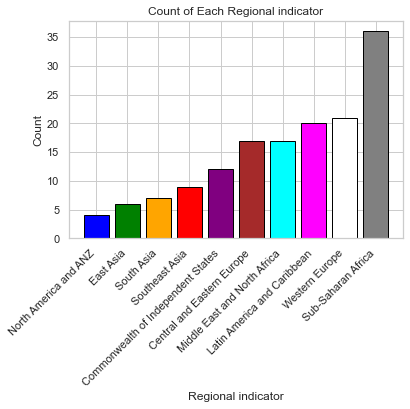

In [425]:
# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Aggregating countries into groups in terms of their regional indicator and sorting the results
regional_counts = new_happiness_2021.groupby('Regional indicator').size().sort_values()

# Defining colors for each decade
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'cyan', 'magenta', 'white', 'gray']

# Create a bar plot
plt.bar(regional_counts.index, regional_counts, color=colors, edgecolor='black')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Regional indicator')
plt.ylabel('Count')
plt.title('Count of Each Regional indicator')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()

**_What percentage of each regional group consists of the happiest countries?_** We can find out by first retrieving relevant descriptive statistics of our 'new_happiness_2021' dataframe.

In [426]:
print(new_happiness_2021['Happiness ranking'].describe())

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Happiness ranking, dtype: float64


Based on the measures of central tendency, we can peg a **threshold for very happy countries** close to the mean, rounded to the nearest ten **i.e. 5.5**.

Let us further add nuance to our analysis by using a data visualization tool built on top matplotlib called seaborn. 

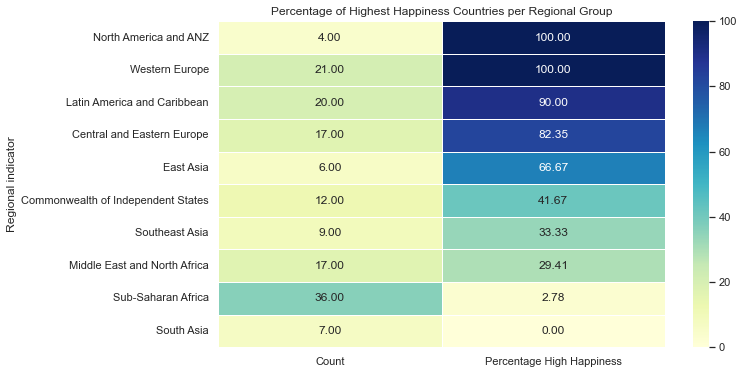

In [427]:
# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Setting a threshold for very happy countries close to the mean, rounded to the nearest ten i.e. 5.5
threshold = 5.5

# Grouping by 'Regional indicator' and calculate count and percentage of countries with ranking >= threshold
grouped_data = new_happiness_2021.groupby('Regional indicator')['Happiness ranking'].agg(['count', lambda x: (x >= threshold).mean() * 100])

# Renaming the columns for clarity
grouped_data.columns = ['Count', 'Percentage High Happiness']

# Sorting the DataFrame by 'Percentage High Happiness' in descending order
grouped_data = grouped_data.sort_values(by='Percentage High Happiness', ascending=False)

# Creating a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Percentage of Highest Happiness Countries per Regional Group')
plt.show()

Among the ten world regions, only the <b>'South Asia'countries' happiness scores appear to fall below the threshold</b>. To be precise, let us subset our dataframe to find out which countries are covered by this finding and what their actual happiness scores are for 2021.

In [430]:
# Let us find out how much lower do South Asia countries' happiness scores are from our threshold of 5.5 
# and identify which are the countries inv
south_asia_df = new_happiness_2021[new_happiness_2021['Regional indicator'] == 'South Asia'][['Country', 'Happiness ranking']].reset_index(drop=True)

# Displaying the resulting dataframe
print(south_asia_df)

       Country  Happiness ranking
0        Nepal              5.269
1     Maldives              5.198
2   Bangladesh              5.025
3     Pakistan              4.934
4    Sri Lanka              4.325
5        India              3.819
6  Afghanistan              2.523


## 4. Multivariate statistical analyses

Multivariate analysis involves the simultaneous analysis of two or more variables to understand the relationships and interactions between them. It explores how changes in one variable relate to changes in another.

Let us raise the complexity of our analysis of 'Happiness' and Global GDP by going beyond the conventional contributing factors of time and place. <i>How do happiness scores and GDP ratings impact <b>longevity i.e. 'Healthy life expectancy'</b></i>? 

### A. GDP, Life expectancy, and Region

/Users/AnikasLab/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


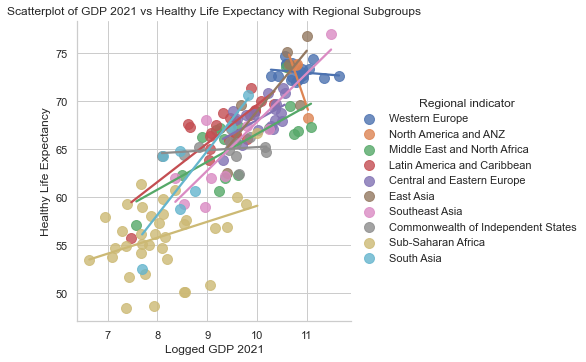

In [431]:
# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Creating scatterplot with trend line and subgroups
sns.lmplot(x='Logged GDP 2021', y='Healthy life expectancy', data=new_happiness_2021, ci=None, hue='Regional indicator', markers='o', scatter_kws={'s': 100})

# Adding labels and title
plt.xlabel('Logged GDP 2021')
plt.ylabel('Healthy Life Expectancy')
plt.title('Scatterplot of GDP 2021 vs Healthy Life Expectancy with Regional Subgroups')

# Showing plot
plt.show()

Let's calculate the <b>correlation</b> between 'Logged GDP 2021' and 'Healthy life expectancy'.

In [432]:
# Computing correlation between 'Logged GDP 2021' and 'Healthy life expectancy'
cor = new_happiness_2021['Logged GDP 2021'].corr(new_happiness_2021['Healthy life expectancy'])

print(cor)

0.8594606242792718


The correlation between GDP per capita and life expectancy in 2021 is roughly 0.86. This indicates a <b>highly linear relationship</b> between the values under <b>'Logged GDP 2021' and 'Healthy life expectancy'</b> of our new_happiness_2021 DataFrame. 

### B. Happiness, Life expectancy, and Region

Using Wendell Berry's thoughts from the essay <b>'Feminism, the Body, and the Machine</b>': <i>Could the goodness of life be determined by its length?</i> Let's find out.

/Users/AnikasLab/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


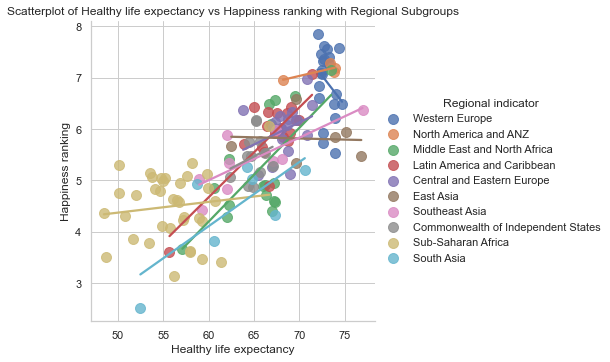

In [433]:
# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Creating scatterplot with trend line and subgroups
sns.lmplot(x='Healthy life expectancy', y='Happiness ranking', data=new_happiness_2021, ci=None, hue='Regional indicator', markers='o', scatter_kws={'s': 100})

# Adding labels and title
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness ranking')
plt.title('Scatterplot of Healthy life expectancy vs Happiness ranking with Regional Subgroups')

# Showing plot
plt.show()

Let's calculate the <b>correlation</b> between 'Healthy life expectancy' and 'Happiness ranking'.

In [434]:
# Computing correlation between 'Healthy life expectancy' and 'Happiness ranking'
cor = new_happiness_2021['Healthy life expectancy'].corr(new_happiness_2021['Happiness ranking'])

print(cor)

0.7680994550105205


The correlation between life expectancy and happiness scores in 2021 is roughly 0.77. This indicates a <b>moderately linear relationship</b> between the values under <b>'Healthy life expectancy' and 'Happiness ranking'</b> of our new_happiness_2021 DataFrame.

### C. GDP, Happiness score, and Region

The correlation coefficient is the statistical measure of linearity in a relationship between variables. While it is a convenient way of quantifying the strength of such statistical relationship, it's not an exact science per se. 

In the context of the World Happiness Report, taking the logarithm of GDP per capita is likely done to address issues related to the scale of economic variables and to better capture relative differences across a wide range of income levels. Our other dataframe, gdp, contains raw gdp per capita in USD per country and we could analyze <b><i>to what considerable extent a non-transformation of the GDP per capita values influences the other variables of 'Happiness ranking' and 'Regional indicator'.</i></b>  

Let us examine the <b>relationship between a country's GDP per capita and happiness score</b> to see if we'll discover the <b><i>limits of the correlation coefficient</i></b>. 

### Recalling our first dataframe 'gdp'

In [435]:
print(gdp.columns)
print(gdp.shape)

Index(['Entity', 'Code', 'Year', 'GDP in USD', 'Decade'], dtype='object')
(10669, 5)


We shall tweak our dataframe further since we are only interested in the GDP values of year 2021

In [436]:
# Filtering observations for the year 2021
gdp_2021 = gdp[gdp['Year'] == 2021]

# Dropping unnecessary columns 'Code' and 'Decade'
gdp_2021 = gdp_2021.drop(['Code', 'Decade'], axis=1)

# Resetting index after filtering
gdp_2021 = gdp_2021.reset_index(drop=True)

# Renaming the DataFrame to 'gdp_2021'
gdp_2021 = gdp_2021.rename(columns={'Entity': 'Country'})

# Displaying the resulting DataFrame
print(gdp_2021.head())

          Country  Year    GDP in USD
0     Afghanistan  2021   17083574000
1         Albania  2021   13582024000
2         Algeria  2021  174201320000
3  American Samoa  2021     648340500
4         Andorra  2021    2911602700


### Merging 'gdp' dataframe with 'new_happiness_2021' dataframe

Let us look at our second dataframe again.

In [437]:
print(new_happiness_2021.columns)
print(new_happiness_2021.shape)

Index(['Country', 'Regional indicator', 'Happiness ranking', 'Logged GDP 2021',
       'Healthy life expectancy', 'Generosity'],
      dtype='object')
(149, 6)


In [438]:
new_happiness_2021.head()

,Country,Regional indicator,Happiness ranking,Logged GDP 2021,Healthy life expectancy,Generosity
0,Finland,Western Europe,7.842,10.775,72.0,-0.098
1,Denmark,Western Europe,7.620,10.933,72.7,0.030
2,Switzerland,Western Europe,7.571,11.117,74.4,0.025
3,Iceland,Western Europe,7.554,10.878,73.0,0.160
4,Netherlands,Western Europe,7.464,10.932,72.4,0.175


Let us create a <b>third dataframe</b> we shall call <b>'happiness_gdp_2021'</b> by fusing elements from the first two dataframes.

In [439]:
def merge_and_select_columns(df1, df2, on_column, columns):
    merged_df = pd.merge(df1, df2, on=on_column, how='inner')
    result_df = merged_df[columns].copy()
    
    for column in columns[1:]:
        result_df[column] = merged_df[column].copy()
    
    return result_df

# Merging 'gdp_2021' and 'new_happiness_2021' dataframes
# retaining and transforming some columns
columns_to_select = ['Country', 'Regional indicator', 'GDP in USD', 'Happiness ranking', 'Healthy life expectancy', 'Generosity']

happiness_gdp_2021 = merge_and_select_columns(gdp_2021, new_happiness_2021, 'Country', columns_to_select)

# Displaying the resulting dataframe
happiness_gdp_2021.head()


,Country,Regional indicator,GDP in USD,Happiness ranking,Healthy life expectancy,Generosity
0,Afghanistan,South Asia,17083574000,2.523,52.493,-0.102
1,Albania,Central and Eastern Europe,13582024000,5.117,68.999,-0.030
2,Algeria,Middle East and North Africa,174201320000,4.887,66.005,-0.067
3,Argentina,Latin America and Caribbean,568142600000,5.929,69.000,-0.182
4,Armenia,Commonwealth of Independent States,12621676000,5.283,67.055,-0.168


In [440]:
happiness_gdp_2021.columns

Index(['Country', 'Regional indicator', 'GDP in USD', 'Happiness ranking',
       'Healthy life expectancy', 'Generosity'],
      dtype='object')

### 'happiness_gdp_2021' dataframe: Plotting the relationship between happiness score, gdp in USD with regions indicated

/Users/AnikasLab/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


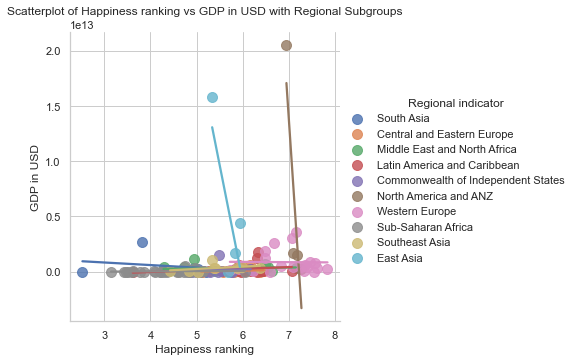

In [441]:
# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Creating scatterplot with trend line and subgroups
sns.lmplot(x='Happiness ranking', y='GDP in USD', data=happiness_gdp_2021, ci=None, hue='Regional indicator', markers='o', scatter_kws={'s': 100})

# Adding labels and title
plt.xlabel('Happiness ranking')
plt.ylabel('GDP in USD')
plt.title('Scatterplot of Happiness ranking vs GDP in USD with Regional Subgroups')

# Showing plot
plt.show()

Our investigation reveals that by not performing a logarithmic transformation to the GDP values culled from the 'gdp' dataframe, we cannot establish a correlation between happiness score and gdp per capita. 

In fact, if we try to determine the correlation coefficient, we shall get a result that clearly shows that a <b>non-linear relationship between the values under 'GDP in USD' and 'Happiness ranking'</B>. 

In [442]:
# Computing correlation between 'Happiness ranking' and 'GDP'
cor = happiness_gdp_2021['Happiness ranking'].corr(happiness_gdp_2021['GDP in USD'])

print(cor)

0.16332890785625584


### 'new_happiness_2021' dataframe: Plotting the relationship between happiness score, logged GDP per capita with regions indicated

/Users/AnikasLab/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


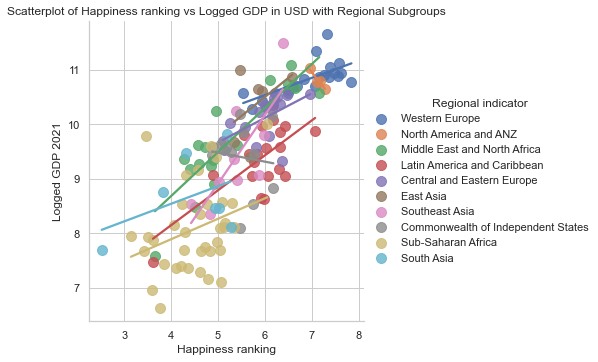

In [443]:
# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Creating scatterplot with trend line and subgroups
sns.lmplot(x='Happiness ranking', y='Logged GDP 2021', data=new_happiness_2021, ci=None, hue='Regional indicator', markers='o', scatter_kws={'s': 100})

# Adding labels and title
plt.xlabel('Happiness ranking')
plt.ylabel('Logged GDP 2021')
plt.title('Scatterplot of Happiness ranking vs Logged GDP in USD with Regional Subgroups')

# Showing plot
plt.show()

To quantify the strength of the linear relationship between happiness scores and logged GDP per capita, let's calculate the <b>correlation 'Happiness ranking' and 'Logged GDP 2021'</b>.

In [444]:
# Computing correlation between 'Healthy life expectancy' and 'Happiness ranking'
cor = new_happiness_2021['Happiness ranking'].corr(new_happiness_2021['Logged GDP 2021'])

print(cor)

0.7897596965098935


The correlation between happiness scores and GDP per capita in 2021 is roughly 0.79. This indicates a <b>highly linear relationship</b> between the values under <b>'Happiness ranking' and 'Logged GDP 2021'</b> of our new_happiness_2021 DataFrame.

### D. 'Giving' as a third variable: Inferring the relationship between/among GDP, Happiness score, and 'Generosity'

Are happy countries also generous? 'Generosity' as a feature of the happiness index is an interesting variable, and we can certainly determine if a <b>relationship exists between 'Happiness ranking'and 'Logged GDP 2021'</b> complemented by indicating <b>a 'Generosity' as a subgroup</b>. 

/Users/AnikasLab/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


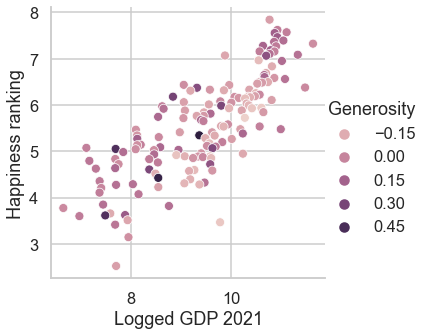

In [449]:
# Setting the context to 'talk' to make the entire figure larger
sns.set_context('talk')

# Creating a scatterplot of 'Happiness ranking' as a function of 'Logged GDP 2021'
# Color is used to indicate level of 'Generosity'
sns.relplot(x='Logged GDP 2021', y='Happiness ranking', hue='Generosity', data=new_happiness_2021, kind='scatter')

#Displaying plot
plt.show()

Based on the plot above, <b>we start to doubt whether happy and/or rich countries are generous</b>. To find out precisely, we can generate the following correlation coefficients:

<p>a. 'Happiness ranking' and 'Generosity'</p>
b. 'Logged GDP 2021' and 'Generosity'

### a.  'Happiness ranking' and 'Generosity'

In [450]:
# Computing correlation between 'Happiness ranking' and 'Generosity'
cor = new_happiness_2021['Happiness ranking'].corr(new_happiness_2021['Generosity'])

print(cor)

-0.017799276922640744


/Users/AnikasLab/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


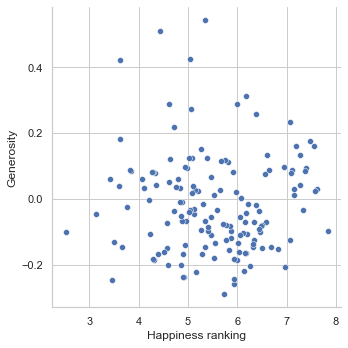

In [452]:
# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Creating a scatterplot of 'Generosity' as a function of 'Happiness score'
sns.relplot(x='Happiness ranking', y='Generosity', data=new_happiness_2021, kind='scatter')

#Displaying plot
plt.show()

Based on our analysis and exploration of the data, the <b>relationship between happiness score and generosity is not linear</b>, i.e. as one variable changes, the other does not change in a constant and proportional manner. Instead, the relationship follows a more complex pattern that cannot be represented by a straight line.

### b. 'Logged GDP 2021' and 'Generosity'

In [451]:
# Computing correlation between 'Logged GDP per capita' and 'Generosity'
cor = new_happiness_2021['Logged GDP 2021'].corr(new_happiness_2021['Generosity'])

print(cor)

-0.19928639866393447


/Users/AnikasLab/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


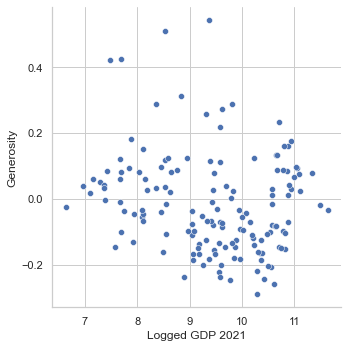

In [453]:
# Setting the context to 'notebook' to make the entire figure larger
sns.set_context('notebook')

# Creating a scatterplot of 'Generosity' as a function of 'Logged GDP 2021'
sns.relplot(x='Logged GDP 2021', y='Generosity', data=new_happiness_2021, kind='scatter')

#Displaying plot
plt.show()

The <b>relationship between logged GDP per capita and generosity is also not linear</b>.

## 5. Summary and next steps